In [ ]:
!pip install lazypredict

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.plotting import scatter_matrix

from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_predict,RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score,f1_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error


# from lazypredict.Supervised import LazyClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB,GaussianNB, ComplementNB, BernoulliNB
from sklearn.pipeline import Pipeline
import xgboost as xgb 
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb

sns.set(rc = {'figure.figsize':(20,10)})
sns.set_palette("viridis")

In [ ]:
# import os
# os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Kaggle"
# %cd /content/drive/MyDrive/Kaggle/
# ! kaggle competitions download -c shai-music-genre-classification

In [ ]:
train_set = pd.read_csv("/content/drive/MyDrive/Kaggle/Music/train (1).csv")


In [ ]:
train_set.head()

,Id,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,1,Marina Maximilian,Not Afraid,37.0,0.334,0.536,9.0,-6.649,0,0.0381,0.378000,NaN,0.106,0.235,152.429,204947.0,4,9
1,2,The Black Keys,Howlin' for You,67.0,0.725,0.747,11.0,-5.545,1,0.0876,0.027200,0.0468,0.104,0.380,132.921,191956.0,4,6
2,3,Royal & the Serpent,phuck u,NaN,0.584,0.804,7.0,-6.094,1,0.0619,0.000968,0.6350,0.284,0.635,159.953,161037.0,4,10
3,4,Detroit Blues Band,Missing You,12.0,0.515,0.308,NaN,-14.711,1,0.0312,0.907000,0.0213,0.300,0.501,172.472,298093.0,3,2
4,5,Coast Contra,My Lady,48.0,0.565,0.777,6.0,-5.096,0,0.2490,0.183000,NaN,0.211,0.619,88.311,254145.0,4,5


In [ ]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14396 entries, 0 to 14395
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  14396 non-null  int64  
 1   Artist Name         14396 non-null  object 
 2   Track Name          14396 non-null  object 
 3   Popularity          14063 non-null  float64
 4   danceability        14396 non-null  float64
 5   energy              14396 non-null  float64
 6   key                 12787 non-null  float64
 7   loudness            14396 non-null  float64
 8   mode                14396 non-null  int64  
 9   speechiness         14396 non-null  float64
 10  acousticness        14396 non-null  float64
 11  instrumentalness    10855 non-null  float64
 12  liveness            14396 non-null  float64
 13  valence             14396 non-null  float64
 14  tempo               14396 non-null  float64
 15  duration_in min/ms  14396 non-null  float64
 16  time

danceability:

> Describes how suitable a track is for dancing based on a combination of 
  musical elements including tempo, rhythm stability, beat strength, and 
  overall regularity.

valence: 
>  Describes the musical positiveness conveyed by a track. Tracks with high
  valence sound more positive (e.g. happy, cheerful, euphoric), while tracks
  with low valence sound more negative (e.g. sad, depressed, angry).

energy: 
>  Represents a perceptual measure of intensity and activity. Typically
  energetic tracks feel fast, loud, and noisy. For example, death metal has
  high energy, while a Bach prelude scores low on the scale.

tempo: 
>  The overall estimated tempo of a track in beats per minute (BPM). In musical 
  terminology, tempo is the speed or pace of a given piece, and derives 
  directly from the average beat duration.

loudness: 
>  The overall loudness of a track in decibels (dB). Loudness values are 
  averaged across the entire track and are useful for comparing relative 
  loudness of tracks.

speechiness: 
>  This detects the presence of spoken words in a track. The more exclusively 
  speech-like the recording (e.g. talk show, audio book, poetry), the closer 
  to 1.0 the attribute value.

instrumentalness: 
>  Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are 
  treated as instrumental in this context. Rap or spoken word tracks are 
  clearly “vocal”.

liveness: 
>  Detects the presence of an audience in the recording. Higher liveness values 
  represent an increased probability that the track was performed live.

acousticness: 
>  A confidence measure from 0.0 to 1.0 of whether the track is acoustic.

key: 
>  The estimated overall key of the track. Integers map to pitches using 
  standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on.

mode: 
>  Indicates the modality (major or minor) of a track, the type of scale from 
  which its melodic content is derived. Major is represented by 1 and minor is 
  0.

duration: 
>  The duration of the track in milliseconds and in minutes.

time_signature: 
>  An estimated overall time signature of a track. The time signature (meter) 
  is a notational convention to specify how many beats are in each bar (or 
  measure).

artist_name

track_name

popularity: 
>  The popularity of the track. The value will be between 0 and 100, with 100 
  being the most popular. The popularity is calculated by algorithm and is 
  based, in the most part, on the total number of plays the track has had and 
  how recent those plays are. Generally speaking, songs that are being played 
  a lot now will have a higher popularity than songs that were played a lot in 
  the past. Artist and album popularity is derived mathematically from track 
  popularity. Note that the popularity value may lag actual popularity by a 
  few days: the value is not updated in real time.

class:
> Ranging from 0 to 10, there are 11 classes and the labels are as follows:  
  0. = "Acoustic/Folk",
  1. = "Alt_music", 
  2. = "Blues", 
  3. = "Bollywood", 
  4. = "Country", 
  5. = "HipHop", 
  6. = "Indie_Alt", 
  7. = "Instrumental", 
  8. = "Metal", 
  9. = "Pop", 
  10. = "Rock"

In [ ]:
train_set.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,14396.0,7198.500000,4155.911573,1.000000,3599.750000,7198.50000,10797.25000,14396.000
Popularity,14063.0,44.525208,17.418940,1.000000,33.000000,44.00000,56.00000,100.000
danceability,14396.0,0.543105,0.165517,0.059600,0.432000,0.54500,0.65800,0.989
energy,14396.0,0.662422,0.235967,0.001210,0.508000,0.69900,0.86100,1.000
key,12787.0,5.953781,3.200013,1.000000,3.000000,6.00000,9.00000,11.000
loudness,14396.0,-7.900852,4.057362,-39.952000,-9.538000,-7.01350,-5.16200,1.342
mode,14396.0,0.640247,0.479944,0.000000,0.000000,1.00000,1.00000,1.000
speechiness,14396.0,0.080181,0.085157,0.022500,0.034800,0.04710,0.08310,0.955
acousticness,14396.0,0.246746,0.310922,0.000000,0.004280,0.08145,0.43225,0.996
instrumentalness,10855.0,0.178129,0.304266,0.000001,0.000088,0.00392,0.20100,0.996


In [ ]:
ids = train_set['Id']
train_set.drop(columns=["Id"],inplace=True)

In [ ]:
train_set.drop(columns=["Track Name","Artist Name"],inplace=True)

In [ ]:
columns = ['Popularity', 'danceability', 'loudness',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_in min/ms']

In [ ]:
duplicateRows = train_set[train_set.duplicated(subset = train_set.columns.difference(['Class']))]
duplicateRows.shape

(1131, 15)

In [ ]:
duplicateRows

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
600,47.0,0.509,0.733,9.0,-5.909,1,0.1260,0.016500,NaN,0.4040,0.676,109.736,75760.0,4,6
671,68.0,0.294,0.745,5.0,-9.138,1,0.0461,0.050000,0.125000,0.6760,0.347,134.364,210107.0,4,10
709,68.0,0.639,0.715,6.0,-8.954,0,0.0392,0.024300,0.000552,0.6190,0.813,128.072,238853.0,4,10
862,42.0,0.897,0.466,10.0,-10.180,1,0.0478,0.556000,0.000165,0.1190,0.522,104.944,175313.0,4,9
1038,72.0,0.649,0.888,6.0,-4.807,1,0.0293,0.013000,0.000002,0.0888,0.553,100.975,208467.0,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14378,54.0,0.426,0.954,9.0,-6.121,1,0.0474,0.001440,NaN,0.1490,0.721,135.302,218666.0,4,10
14379,NaN,0.520,0.967,3.0,-3.837,0,0.4890,0.002480,0.000003,0.3280,0.477,179.924,149500.0,4,1
14381,69.0,0.282,0.656,8.0,-6.557,1,0.0302,0.010500,NaN,0.0892,0.242,139.352,251867.0,4,10
14384,48.0,0.638,0.666,4.0,-6.951,0,0.0392,0.007840,0.000067,0.3140,0.651,131.962,185455.0,4,6


In [ ]:
train_set.drop_duplicates(subset = train_set.columns.difference(['Class']), inplace = True, ignore_index = True)

In [ ]:
train_set.loc[(train_set['duration_in min/ms'] < 30)]['duration_in min/ms']

6        3.893933
10       4.347117
14       3.863867
18       5.227267
19       3.398883
           ...   
13245    6.357333
13246    4.347200
13250    2.213000
13252    2.642450
13264    2.614567
Name: duration_in min/ms, Length: 2074, dtype: float64

In [ ]:
condition = train_set['duration_in min/ms'] < 30
condition.value_counts()

False    11191
True      2074
Name: duration_in min/ms, dtype: int64

In [ ]:
# condition = train_set['duration_in min/ms'] > 30
# train_set.loc[condition,'duration_in min/ms'] = train_set.loc[condition,'duration_in min/ms']/60000

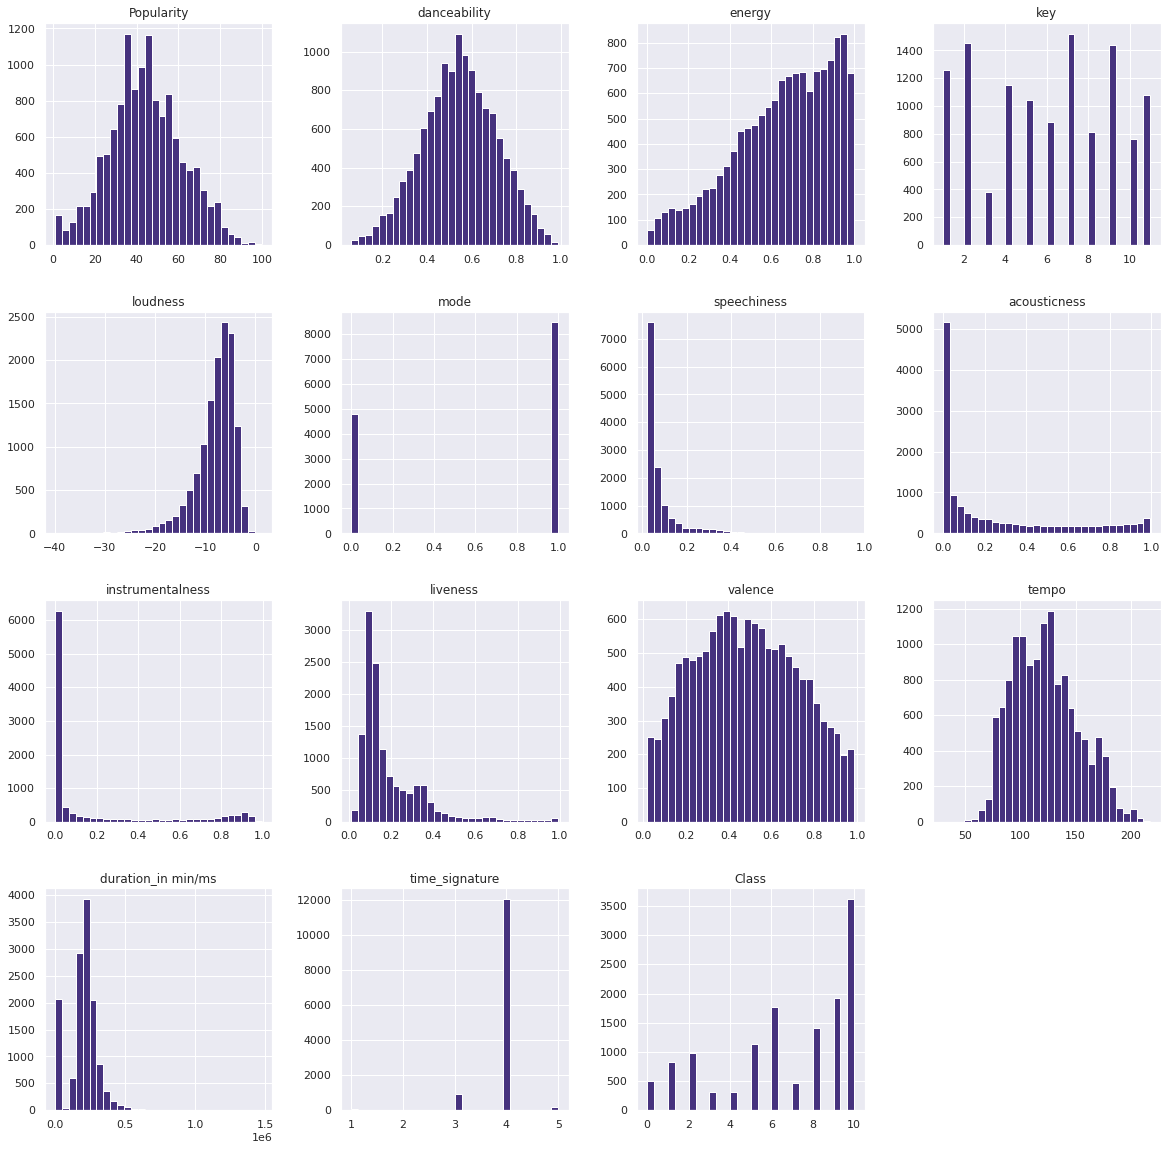

In [ ]:
train_set.hist(figsize=(20,20),bins=30)
plt.show()

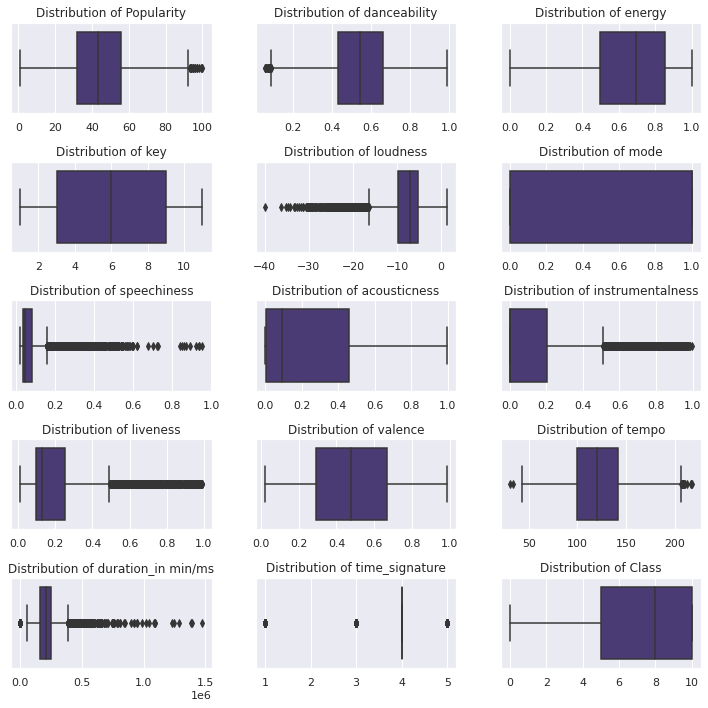

In [ ]:
df_cont = train_set.select_dtypes([int,float])

fig = plt.figure(figsize=(10, 10))
for i,columns in enumerate(df_cont.columns, 1): 
    ax = plt.subplot(5,3,i)
    sns.boxplot(data = df_cont, x=df_cont[columns])
    ax.set_xlabel(None)
    ax.set_title(f'Distribution of {columns}')
    plt.tight_layout(w_pad=3)

plt.show()

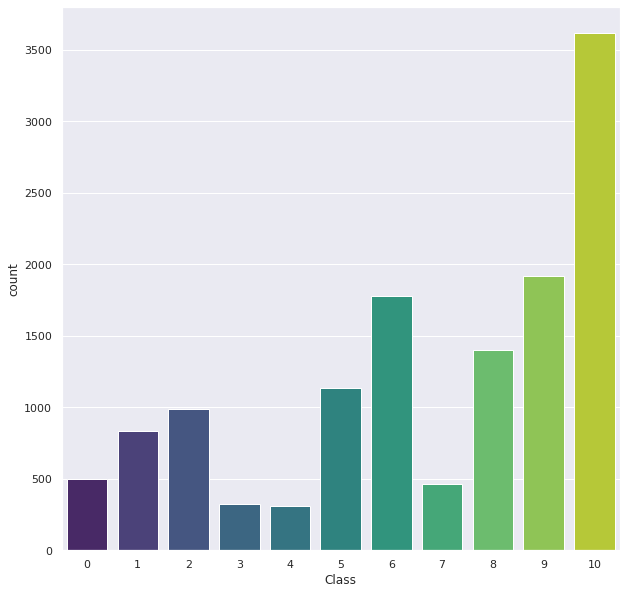

In [ ]:
fig = plt.figure(figsize=(10, 10))
sns.countplot(data = train_set, x= train_set["Class"],palette="viridis")
plt.show()

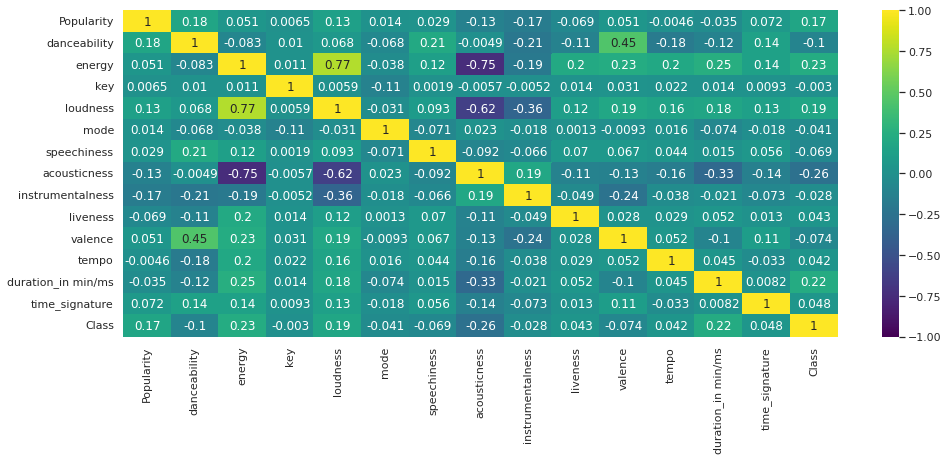

In [ ]:
plt.figure(figsize=(16, 6))
sns.heatmap(data = df_cont.corr(), vmin = -1, vmax = 1, annot = True,cmap="viridis") 

In [ ]:
# train_set.drop(columns=['energy'],inplace=True) 
# reduced accuracy

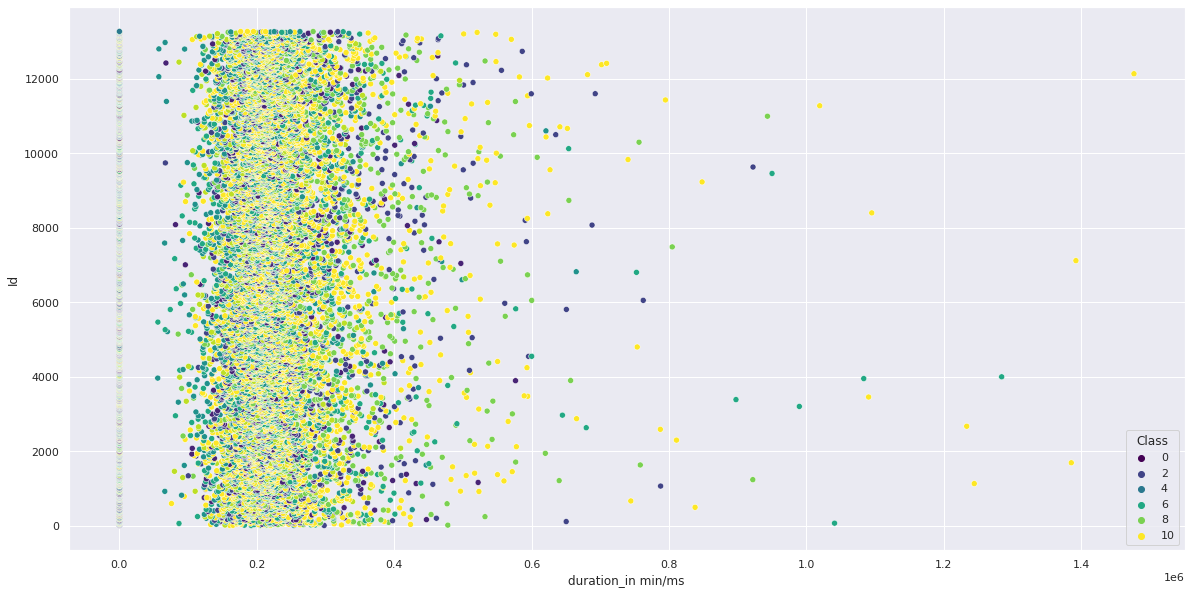

In [ ]:
sns.scatterplot(data=train_set,y=ids,x='duration_in min/ms',hue='Class',x_bins=50,palette="viridis")
plt.show()

In [ ]:
train_set[["Popularity", "instrumentalness", "key"]].isna().sum()

Popularity           314
instrumentalness    3326
key                 1482
dtype: int64

In [ ]:
p_imputer = SimpleImputer(strategy='median')
train_set["Popularity"] = p_imputer.fit_transform(train_set["Popularity"].to_numpy().reshape(-1,1))

i_imputer = SimpleImputer(strategy='median')
train_set["instrumentalness"] = i_imputer.fit_transform(train_set["instrumentalness"].to_numpy().reshape(-1,1))

k_imputer = SimpleImputer(strategy='constant', fill_value = -1)
train_set["key"] = k_imputer.fit_transform(train_set["key"].to_numpy().reshape(-1,1))

In [ ]:
train_set.isna().sum()

Popularity            0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
duration_in min/ms    0
time_signature        0
Class                 0
dtype: int64

In [ ]:
def transformer(df:pd.DataFrame,colxtran):
  temp = df.copy()
  for column, transformation in colxtran:
    temp[column] = df[column].transform(transformation)
  return temp.copy()

cxt = [('loudness',np.cbrt),('acousticness',np.cbrt),('tempo',np.cbrt),('liveness',np.log),
       ('instrumentalness',np.log),('speechiness',np.reciprocal),('duration_in min/ms',np.sqrt)]
transformed_train = transformer(train_set,cxt)

In [ ]:
train_set = transformed_train.copy()

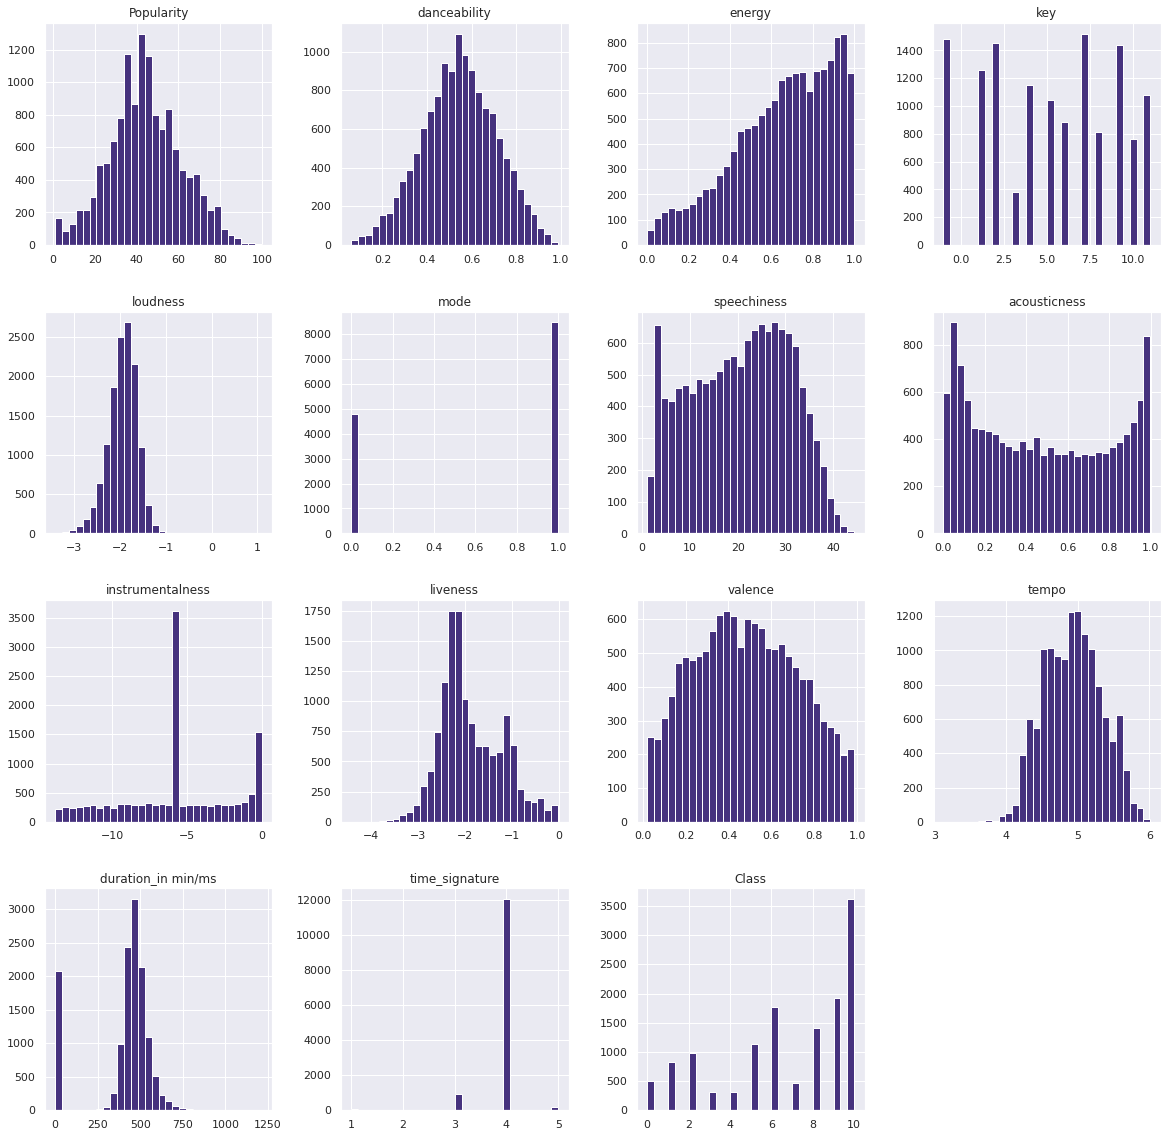

In [ ]:
transformed_train.hist(figsize=(20,20),bins=30)
plt.show()

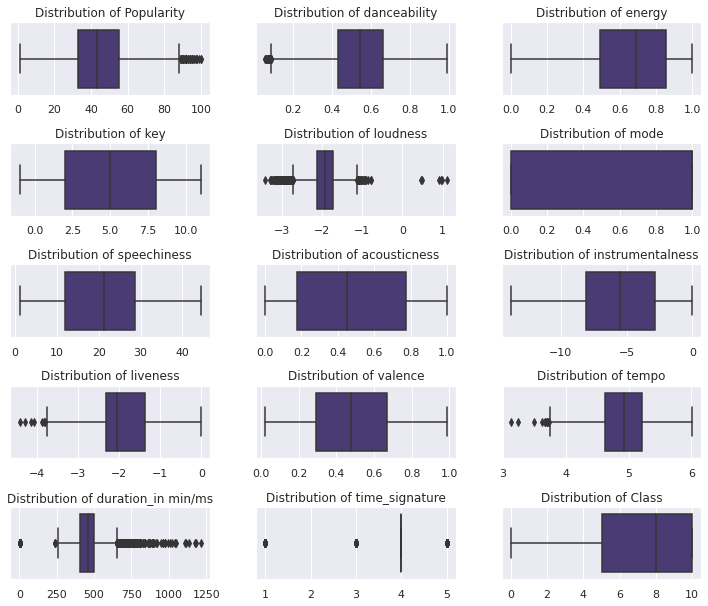

In [ ]:
df_cont = train_set.select_dtypes([int,float])

fig = plt.figure(figsize=(10, 10))
for i,columns in enumerate(df_cont.columns, 1): 
    ax = plt.subplot(6,3,i)
    sns.boxplot(data = df_cont, x=df_cont[columns])
    ax.set_xlabel(None)
    ax.set_title(f'Distribution of {columns}')
    plt.tight_layout(w_pad=3)

plt.show()

In [ ]:
train_set[["key","mode","time_signature","Class"]].nunique()

key               12
mode               2
time_signature     4
Class             11
dtype: int64

In [ ]:
train_set = train_set.astype({"key": int,})

In [ ]:
train_set = train_set.astype({"key": str,"time_signature": str})

In [ ]:
for i in train_set['key'].unique() :
    train_set.loc[ train_set['key'] == i, 'key'] = "key" + str(i)

for i in train_set['time_signature'].unique() :
    train_set.loc[ train_set['time_signature'] == i, 'time_signature'] = "time_signature" + str(i)

In [ ]:
train_set.head()

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,37.0,0.334,0.536,key9,-1.880408,0,26.246719,0.723043,-5.534040,-2.244316,0.235,5.341819,1.848184,time_signature4,9
1,67.0,0.725,0.747,key11,-1.769975,1,11.415525,0.300739,-3.061872,-2.263364,0.380,5.103458,1.788649,time_signature4,6
2,43.0,0.584,0.804,key7,-1.826561,1,16.155089,0.098922,-0.454130,-1.258781,0.635,5.428304,1.638277,time_signature4,10
3,12.0,0.515,0.308,key-1,-2.450271,1,32.051282,0.967986,-3.849048,-1.203973,0.501,5.566380,2.228950,time_signature3,2
4,48.0,0.565,0.777,key6,-1.720850,0,4.016064,0.567741,-5.534040,-1.555897,0.619,4.453194,2.058094,time_signature4,5


In [ ]:

k_enc = OneHotEncoder()
k_enc_df = k_enc.fit_transform(train_set[["key"]])

ts_enc = OneHotEncoder()
ts_enc_df = ts_enc.fit_transform(train_set[["time_signature"]])


In [ ]:
train_set[k_enc.categories_[0]] = k_enc_df.toarray()
train_set[ts_enc.categories_[0]] = ts_enc_df.toarray()

In [ ]:
train_set.drop(columns=['key','time_signature'],inplace=True)

In [ ]:
train_set.drop(columns=['mode'],inplace=True)

In [ ]:
train_set.head().T

,0,1,2,3,4
Popularity,37.000000,67.000000,43.000000,12.000000,48.000000
danceability,0.334000,0.725000,0.584000,0.515000,0.565000
energy,0.536000,0.747000,0.804000,0.308000,0.777000
key,9.000000,11.000000,7.000000,-1.000000,6.000000
loudness,-1.880408,-1.769975,-1.826561,-2.450271,-1.720850
mode,0.000000,1.000000,1.000000,1.000000,0.000000
speechiness,26.246719,11.415525,16.155089,32.051282,4.016064
acousticness,0.723043,0.300739,0.098922,0.967986,0.567741
instrumentalness,-5.534040,-3.061872,-0.454130,-3.849048,-5.534040
liveness,-2.244316,-2.263364,-1.258781,-1.203973,-1.555897


In [ ]:
X = train_set.drop(columns=["Class"])
y = train_set["Class"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8887, 14), (8887,), (4378, 14), (4378,))

In [ ]:
scaler = StandardScaler()
normalized_x_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)

In [ ]:
normalized_x_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

In [ ]:
xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(normalized_x_train,y_train)
xgb_clf.score(normalized_x_test,y_test)

0.5625856555504797

In [ ]:
rf_clf = RandomForestClassifier()
rf_clf.fit(normalized_x_train,y_train)
rf_clf.score(normalized_x_test,y_test)

0.5648698035632709

In [ ]:
kn_clf = KNeighborsClassifier()
kn_clf.fit(normalized_x_train, y_train)
kn_clf.score(normalized_x_test,y_test)


0.44380995888533575

In [ ]:
gnb_clf = GaussianNB()
gnb_clf.fit(normalized_x_train,y_train)
gnb_clf.score(normalized_x_test,y_test)

0.46779351301964367

In [ ]:
bnb_clf = BernoulliNB()
bnb_clf.fit(normalized_x_train,y_train)
bnb_clf.score(normalized_x_test,y_test)

0.3951576062128826

In [ ]:
lgr_clf = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lgr_clf.fit(normalized_x_train,y_train)
lgr_clf.score(normalized_x_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.5102786660575606

In [ ]:
svc_clf = SVC()
svc_clf.fit(normalized_x_train,y_train)
svc_clf.score(normalized_x_test,y_test)

0.5479671082686158

In [ ]:
lgbm_clf = LGBMClassifier()
lgbm_clf.fit(normalized_x_train,y_train)
lgbm_clf.score(normalized_x_test,y_test)

0.5701233439926907

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['log2', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

rf = RandomForestClassifier()

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)
    
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X, y)

print("\n The best estimator across ALL searched params:\n",
          rf_random.best_estimator_)
    
print("\n The best score across ALL searched params:\n",
          rf_random.best_score_)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['log2', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}
Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning



 The best estimator across ALL searched params:
 RandomForestClassifier(max_depth=100, max_features='sqrt', min_samples_leaf=4,
                       min_samples_split=10, n_estimators=800)

 The best score across ALL searched params:
 0.5275272161741835


In [ ]:

lgbm_clf = LGBMClassifier(objective="multi:softmax",num_class=12)

params = {
    "gamma": randint(4,10),
    "learning_rate": uniform(),
    "max_depth": randint(4,10),
    "n_estimators": randint(100,1500),
    'num_leaves': randint(10,30),
    'feature_fraction': uniform(),
    'subsample': uniform()
}


lgbm_random = RandomizedSearchCV(lgbm_clf, param_distributions=params, random_state=42, n_iter=100, cv=3, verbose=1, n_jobs=-1)

lgbm_random.fit(X_train, y_train)

print("\n The best estimator across ALL searched params:\n",
          lgbm_random.best_estimator_)
    
print("\n The best score across ALL searched params:\n",
          lgbm_random.best_score_)


Fitting 3 folds for each of 100 candidates, totalling 300 fits

 The best estimator across ALL searched params:
 LGBMClassifier(feature_fraction=0.8021969807540397, gamma=4,
               learning_rate=0.01563640674119393, max_depth=4,
               n_estimators=1467, num_class=12, num_leaves=10,
               objective='multi:softmax', subsample=0.1987156815341724)

 The best score across ALL searched params:
 0.5616068050331005


In [ ]:


#Converting the dataframe into XGBoost’s Dmatrix object
dtrain = xgb.DMatrix(X, y)

#Bayesian Optimization function for xgboost
#specify the parameters you want to tune as keyword arguments
def bo_tune_xgb(max_depth, gamma, n_estimators ,learning_rate):
     params = {'max_depth': int(max_depth),
              'gamma': gamma,
              'n_estimators': int(n_estimators),
              'learning_rate':learning_rate,
              'subsample': 0.8,
              'eta': 0.1,
              'num_class': 12,
              'eval_metric': 'merror'}
     #Cross validating with the specified parameters in 5 folds and 70 iterations
     cv_result = xgb.cv(params, dtrain, num_boost_round=70, nfold=5)
     #Return the negative RMSE
     return cv_result['test-merror-mean'].iloc[-1]

#Invoking the Bayesian Optimizer with the specified parameters to tune
xgb_bo = BayesianOptimization(bo_tune_xgb, {'max_depth': (3, 10),
                                             'gamma': (0, 1),
                                             'learning_rate':(0,1),
                                             'n_estimators':(100,500)
                                            })

#performing Bayesian optimization for 5 iterations with 8 steps of random exploration with an #acquisition function of expected improvement
xgb_bo.maximize(n_iter=5, init_points=8, acq='ei')

|   iter    |  target   |   gamma   | learni... | max_depth | n_esti... |
-------------------------------------------------------------------------


KeyboardInterrupt: ignored

In [ ]:
params = xgb_bo.max['params']

#Converting the max_depth and n_estimator values from float to int
params['max_depth']= int(params['max_depth'])
params['n_estimators']= int(params['n_estimators'])

#Extracting the best parameters
print(params)

In [ ]:
rf_clf = RandomForestClassifier(max_depth=100, max_features='sqrt', min_samples_leaf=4,
                       min_samples_split=10, n_estimators=800)
rf_clf.fit(X_train,y_train)
rf_clf.score(X_test,y_test)

0.5641845591594336

In [ ]:

xgb_model = xgb.XGBClassifier(objective="multi:softmax",num_class=12,learning_rate=0.06491636419308522, max_depth=4, n_estimators=119,gamma=0.6958530170035535, random_state=42,eval_metric="merror")
xgb_model.fit(X_train, y_train)
xgb_model.score(X_test,y_test)

0.563270899954317

In [ ]:
lgbm_model = LGBMClassifier(feature_fraction=0.8021969807540397, gamma=4,
               learning_rate=0.01563640674119393, max_depth=4,
               n_estimators=1467, num_class=12, num_leaves=10,
               objective='multi:softmax', subsample=0.1987156815341724,boosting_type='dart')
lgbm_model.fit(normalized_x_train, y_train,eval_set=[(normalized_x_test,y_test),(normalized_x_train,y_train)],eval_metric='multi_error',early_stopping_rounds=30,verbose=False)
next = lgbm_model.score(normalized_x_test,y_test)

In [ ]:
next

0.5646413887619918

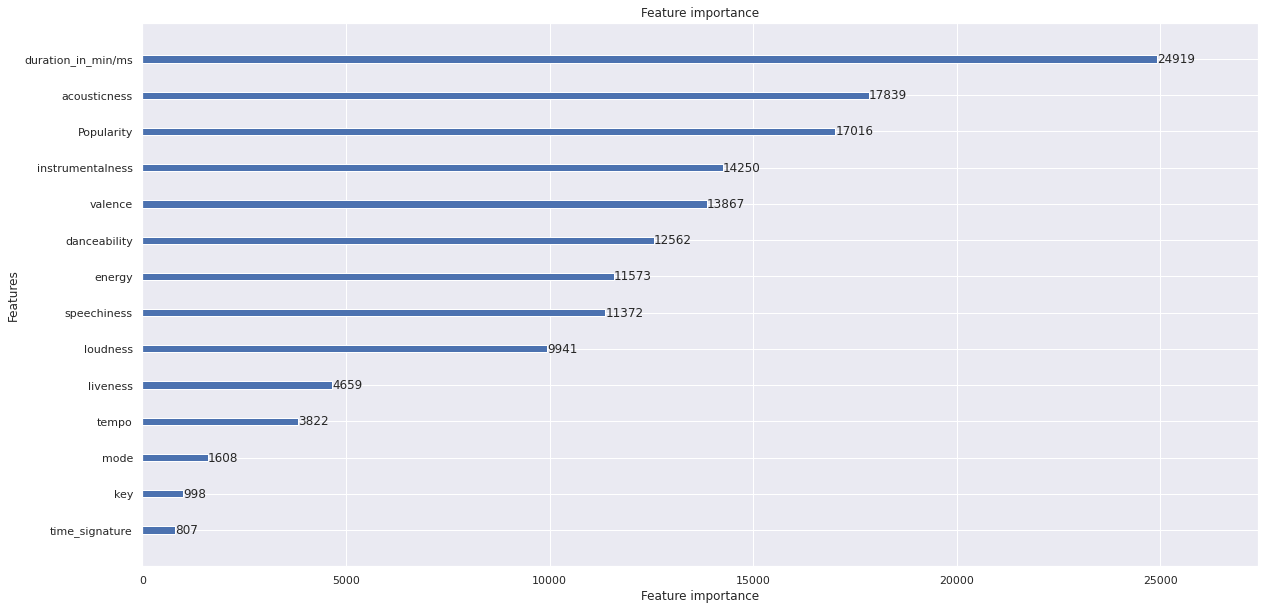

In [ ]:
lgb.plot_importance(lgbm_model)

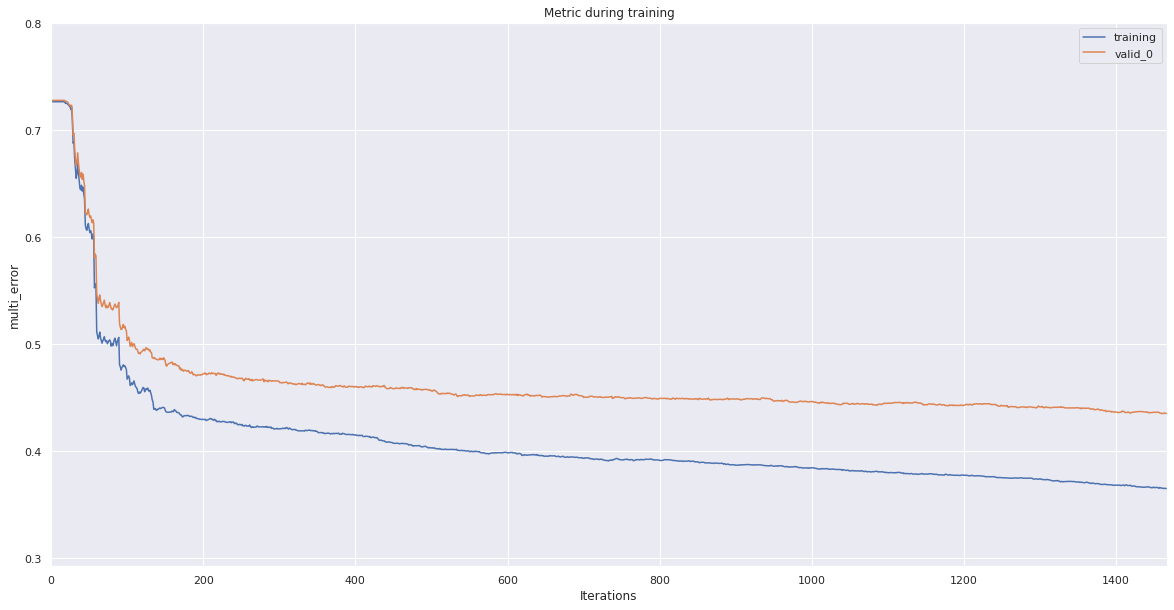

In [ ]:
lgb.plot_metric(lgbm_model,metric='multi_error')
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


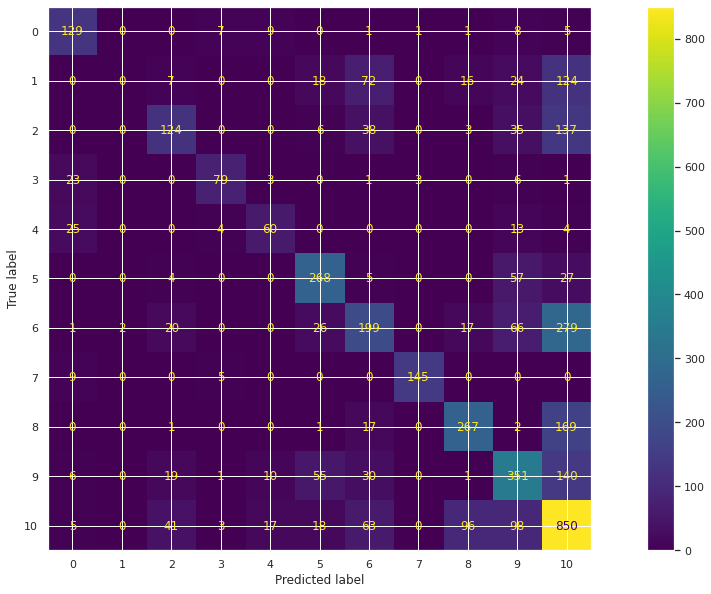

In [ ]:
from sklearn import metrics
metrics.plot_confusion_matrix(lgbm_model,normalized_x_test,y_test)

In [ ]:
print(metrics.classification_report(y_test,lgbm_model.predict(normalized_x_test)))

              precision    recall  f1-score   support

           0       0.65      0.80      0.72       161
           1       0.00      0.00      0.00       261
           2       0.57      0.36      0.44       343
           3       0.80      0.68      0.73       116
           4       0.61      0.57      0.59       106
           5       0.68      0.74      0.71       361
           6       0.47      0.33      0.38       610
           7       0.97      0.91      0.94       159
           8       0.67      0.58      0.62       457
           9       0.53      0.57      0.55       613
          10       0.49      0.71      0.58      1191

    accuracy                           0.56      4378
   macro avg       0.59      0.57      0.57      4378
weighted avg       0.54      0.56      0.54      4378



In [ ]:
from sklearn.multiclass import OneVsRestClassifier

ovo_clf = OneVsRestClassifier(rf_clf,n_jobs=-1)
ovo_clf.fit(X_train, y_train)
ovo_clf.score(X_test,y_test)


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


0.5249421174489581

In [ ]:
from sklearn.ensemble import BaggingClassifier

bag_clf = BaggingClassifier(
    lgbm_model, n_estimators=10, random_state=42)
bag_clf.fit(X_train, y_train)
bag_clf.score(X_test, y_test)

0.5589440145653164

In [ ]:
models = []
models.append(('xgb', xgb_model))
models.append(('lgbm', lgbm_model))
models.append(('svc', SVC()))

vm = VotingClassifier(models)
vm.fit(X_train,y_train)
vm.score(X_test,y_test)


0.5612198452435139

In [ ]:
score = cross_val_score(vm, X, y, cv = KFold(n_splits=10))
score.mean()

0.5459864103158056

In [ ]:
test_set = pd.read_csv("/content/drive/MyDrive/Kaggle/Music/test (2).csv")

In [ ]:
test_Ids = test_set["Id"]

In [ ]:
test_set.drop(columns=["Track Name","Artist Name","Id"],inplace=True)

In [ ]:
test_set["Popularity"] = p_imputer.transform(test_set[["Popularity"]])

test_set["instrumentalness"] = i_imputer.transform(test_set[["instrumentalness"]])

test_set["key"] = k_imputer.transform(test_set[["key"]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
# test_set = test_set.astype({"key": int,})
# test_set = test_set.astype({"key": str,"time_signature": str})

In [ ]:
# for i in test_set['key'].unique() :
#     test_set.loc[ test_set['key'] == i, 'key'] = "key" + str(i)

# for i in test_set['time_signature'].unique() :
#     test_set.loc[ test_set['time_signature'] == i, 'time_signature'] = "time_signature" + str(i)

In [ ]:
# test_set[k_enc.categories_[0]] = k_enc.transform(test_set[["key"]]).toarray()
# test_set[ts_enc.categories_[0]] = ts_enc.transform(test_set[["time_signature"]]).toarray()

In [ ]:
# test_set.loudness = loudness_scaler.transform(test_set[['loudness']])

In [ ]:
# test_set.drop(columns=['key','time_signature'],inplace=True)

In [ ]:
transformed_test = transformer(test_set,cxt)
test_set = transformed_test.copy()

In [ ]:
# transformed_test["Artist Name"] = artist_enc.transform(transformed_test["Artist Name"])
# transformed_test["Track Name"] = track_enc.transform(transformed_test["Track Name"])

In [ ]:
transformed_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600 entries, 0 to 3599
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Popularity          3600 non-null   float64
 1   danceability        3600 non-null   float64
 2   energy              3600 non-null   float64
 3   key                 3600 non-null   float64
 4   loudness            3600 non-null   float64
 5   mode                3600 non-null   int64  
 6   speechiness         3600 non-null   float64
 7   acousticness        3600 non-null   float64
 8   instrumentalness    3600 non-null   float64
 9   liveness            3600 non-null   float64
 10  valence             3600 non-null   float64
 11  tempo               3600 non-null   float64
 12  duration_in min/ms  3600 non-null   float64
 13  time_signature      3600 non-null   int64  
dtypes: float64(12), int64(2)
memory usage: 393.9 KB


In [ ]:
normalized_test = pd.DataFrame(scaler.transform(transformed_test), columns = transformed_test.columns)

In [ ]:
final_model = lgbm_model
final_predictions = final_model.predict(normalized_test)

In [ ]:
submission = pd.DataFrame({'id':test_Ids,'Class':final_predictions})

In [ ]:
submission

,id,Class
0,14397,9
1,14398,6
2,14399,9
3,14400,10
4,14401,5
...,...,...
3595,17992,10
3596,17993,5
3597,17994,6
3598,17995,2


In [ ]:
submission.to_csv('submission.csv',index=False)